In [2]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing



In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def twitter_setup():
   


    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api
    
    

In [ ]:
api = tweepy.API(auth)

tweets = []
for page in tweepy.Cursor(api.user_timeline, screen_name='realDonaldTrump', count=200).pages():
    tweets.extend(page)
print("Downloaded", len(tweets), "tweets")



In [ ]:
for tweet in tweets:
  print(tweet.text) 
  print() 

In [ ]:
print(dir(tweets[0]))

In [ ]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

In [4]:
# Because it's a realtime scraping, so I saved a csv.file when I scraped with Tweepy API

In [6]:
data = pd.read_csv('Trump_tweets_3205_7_15.csv')
data.head()


,Tweets,len,ID,Date,Source,Likes,RTs
0,"Congratulations to France, who played extraord...",140,1018541464416997376,2018-07-15 17:03:03,Twitter for iPhone,40883,12336
1,...know how to do is resist and obstruct! This...,139,1018530179549822977,2018-07-15 16:18:12,Twitter for iPhone,18880,4173
2,"...over the years, I would return to criticism...",140,1018530173006692352,2018-07-15 16:18:11,Twitter for iPhone,17415,3952
3,"Heading to Helsinki, Finland – looking forward...",140,1018530167902228480,2018-07-15 16:18:10,Twitter for iPhone,20347,4958
4,There hasn’t been a missile or rocket fired in...,140,1018528420093878272,2018-07-15 16:11:13,Twitter for iPhone,43900,11399


In [7]:
# countries
data[data.Tweets.str.contains('China')].shape

(58, 7)

In [8]:
data[data.Tweets.str.contains('Germany')].shape

(17, 7)

In [9]:
data[data.Tweets.str.contains('Canada')].shape
    

(24, 7)

In [12]:
data[data.Tweets.str.contains('France')].shape

(19, 7)

In [13]:
data[data.Tweets.str.contains('Mexico')].shape

(25, 7)

In [14]:
data[data.Tweets.str.contains('Iran')].shape

(34, 7)

In [15]:
data[data.Tweets.str.contains('Japan')].shape

(25, 7)

In [16]:
data[data.Tweets.str.contains('U.S.')].shape

(188, 7)

In [17]:
data[data.Tweets.str.contains('United States')].shape

(69, 7)

In [18]:
data[data.Tweets.str.contains(' USA ')].shape

(1, 7)

In [19]:
data[data.Tweets.str.contains('South Korea')].shape

(21, 7)

In [20]:
data[data.Tweets.str.contains('Russia')].shape

(111, 7)

In [21]:
data[data.Tweets.str.contains('Italy')].shape

(3, 7)

In [22]:
data[data.Tweets.str.contains('Israel')].shape

(10, 7)

In [23]:
data[data.Tweets.str.contains('Saudi Arabia')].shape

(5, 7)

In [24]:
data[data.Tweets.str.contains('Turkey')].shape

(3, 7)

In [25]:
data[data.Tweets.str.contains('Singapore')].shape

(10, 7)

In [26]:
data[data.Tweets.str.contains('Australia')].shape

(2, 7)

In [27]:
data[data.Tweets.str.contains('North Korea')].shape

(85, 7)

In [28]:
data[data.Tweets.str.contains('North Korea')].shape

(85, 7)

In [29]:
data[data.Tweets.str.contains('United Kingdom')].shape

(4, 7)

In [30]:
data[data.Tweets.str.contains('Poland')].shape

(6, 7)

In [31]:
data[data.Tweets.str.contains('Pakistan')].shape

(3, 7)

In [32]:
data[data.Tweets.str.contains('Spain')].shape

(4, 7)

In [33]:
data[data.Tweets.str.contains('Syria')].shape

(17, 7)

In [34]:
data[data.Tweets.str.contains('Vietnam')].shape

(11, 7)

In [48]:
C_Tweets_No = pd.DataFrame({
   
    'country':['US','China', 'Russia', 'North Korea','South Korea','Japan','India','Singapor','Vietnam','Australia','Turkey','Pakistan','Canada','Mexico','Cuba','Brazil','Isreal','Italy','Germany','France','Poland','Spain','Switzerland','Iran','Syria','Saudi Arabia','Qatar','South Africa'],
    'Tweets_No':[260,58,111,83,21,25,9,10,11,10,3,3,24,24,3,1,10,3,17,17,6,4,6,34,17,6,2,0],
})
C_Tweets_No = C_Tweets_No[['country','Tweets_No']]

C_Tweets_No




,country,Tweets_No
0,US,260
1,China,58
2,Russia,111
3,North Korea,83
4,South Korea,21
5,Japan,25
6,India,9
7,Singapor,10
8,Vietnam,11
9,Australia,10


In [49]:
C_Tweets_No.sort_values(by = 'Tweets_No',ascending = False).head()

,country,Tweets_No
0,US,260
2,Russia,111
3,North Korea,83
1,China,58
23,Iran,34


In [50]:
# Give a rate column to countries concerned tweets.

def get_count_rate(rate):
        
        if rate > 200:
            return 'extre_high'
        elif rate > 100 and rate < 201:
            return 'high'
        elif rate > 80 and rate < 101:
            return 'relative_high'
        elif rate > 60 and rate < 81:
            return 'middle_high'
        elif rate > 40 and rate < 61:
            return 'middle'
        elif rate > 20 and rate < 41:
            return 'relative_middle'
        elif rate > 0 and rate < 21:
            return 'low'
        else:
            return 'very_low'
        
       

In [52]:
C_Tweets_No['Rate'] = C_Tweets_No.Tweets_No.apply(get_count_rate)
C_Tweets_No.head()

,country,Tweets_No,Rate
0,US,260,extre_high
1,China,58,middle
2,Russia,111,high
3,North Korea,83,relative_high
4,South Korea,21,relative_middle


In [53]:
# Give a region column.
Aisa = ['China','Japan','South Korea','North Korea','India','Singapor','Vietnam','Australia','Turkey','Pakistan']
North_America = ['Canada','US']
South_America = ['Mexico','Cuba','Brazil']
Europe = ['Italy','Germany','France','Poland','Spain','Switzerland','Russia','Britain']
Middle_East = ['Iran','Syria','Saudi Arabia','Qatar','Isreal']

def get_region_1(country):
    if country in Aisa:
        return 'Asia'
    elif country in North_America:
        return 'North America'
    elif country in South_America:
        return 'Sourth America'
    elif country in Europe:
        return 'Europe'
    elif country in Middle_East:
        return 'Middle East'

In [54]:
C_Tweets_No['Region'] = C_Tweets_No.country.apply(get_region_1)
C_Tweets_No.head()

,country,Tweets_No,Rate,Region
0,US,260,extre_high,North America
1,China,58,middle,Asia
2,Russia,111,high,Europe
3,North Korea,83,relative_high,Asia
4,South Korea,21,relative_middle,Asia


In [55]:
C_Tweets_No.sort_values(by = 'Tweets_No',ascending = False).head()

,country,Tweets_No,Rate,Region
0,US,260,extre_high,North America
2,Russia,111,high,Europe
3,North Korea,83,relative_high,Asia
1,China,58,middle,Asia
23,Iran,34,relative_middle,Middle East


In [76]:
# political leader's name, many names are tricky to get, so I have to be careful. 


In [66]:
#Tweets_Content = data.Tweets
#Tweets_Content.head()  

0    Congratulations to France, who played extraord...
1    ...know how to do is resist and obstruct! This...
2    ...over the years, I would return to criticism...
3    Heading to Helsinki, Finland – looking forward...
4    There hasn’t been a missile or rocket fired in...
Name: Tweets, dtype: object

In [37]:
data[data.Tweets.str.contains('Putin')].shape

(9, 7)

In [38]:
data[data.Tweets.str.contains('Kim Jong Un')].shape

(13, 7)

In [39]:
data[data.Tweets.str.contains('Kim Jong-un')].shape

(3, 7)

In [40]:
data[data.Tweets.str.contains(' Kim ')].shape

(18, 7)

In [41]:
data[data.Tweets.str.contains('Xi')].shape

(21, 7)

In [42]:
data[data.Tweets.str.contains('Macron')].shape

(14, 7)

In [43]:
data[data.Tweets.str.contains('Angela Merkel')].shape

(5, 7)

In [44]:
data[data.Tweets.str.contains('Merkel')].shape

(6, 7)

In [45]:
data[data.Tweets.str.contains('Justin Trudeau')].shape

(1, 7)

In [46]:
data[data.Tweets.str.contains('Trudeau')].shape

(6, 7)

In [47]:
data[data.Tweets.str.contains('Abe')].shape

(22, 7)

In [77]:
data[data.Tweets.str.contains('Modi')].shape

(1, 7)

In [78]:
P_Tweets_No = pd.DataFrame({
   
    'Leaders':['Xi','Theresa', 'Putin', 'Modi','Abe','Macron','Trudeau','Moon Jae-in','Angela Merkel','Kim Jong-un'],
    'Country':['China','Britain','Russia','India','Japan','France','Canada','South Korea','Germany','North Korea'],
    'Tweets_No':[21,2,8,1,22,14,6,1,5,17],
})
P_Tweets_No = P_Tweets_No[['Leaders','Country','Tweets_No']]

P_Tweets_No.head()

,Leaders,Country,Tweets_No
0,Xi,China,21
1,Theresa,Britain,2
2,Putin,Russia,8
3,Modi,India,1
4,Abe,Japan,22


In [79]:
P_Tweets_No.sort_values(by = 'Tweets_No',ascending = False).head()

,Leaders,Country,Tweets_No
4,Abe,Japan,22
0,Xi,China,21
9,Kim Jong-un,North Korea,17
5,Macron,France,14
2,Putin,Russia,8


In [ ]:
#to see favorate likes.

In [80]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

In [81]:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

The tweet with more likes is: 
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4
Number of likes: 602782
140 characters.



In [82]:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more retweets is: 
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
Number of retweets: 344368
42 characters.



In [83]:
# We create time series for data:


tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

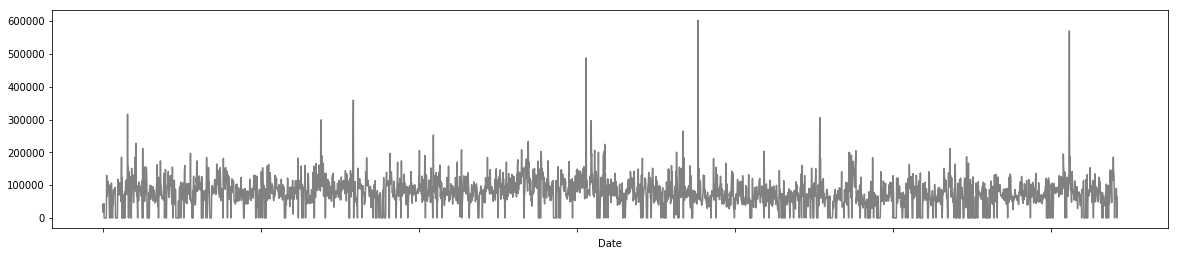

In [84]:
tfav.plot(figsize=(20,4), color='grey');

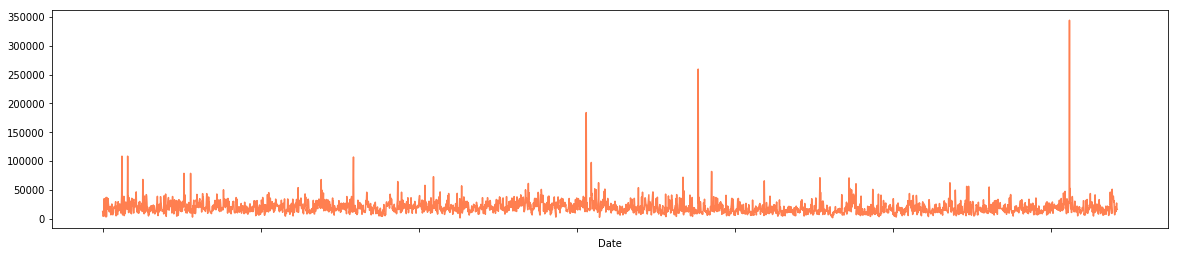

In [85]:
tret.plot(figsize=(20,4), color='coral');

In [87]:
# to see sources

In [88]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio
* Twitter for iPad
* Twitter Web Client
* Twitter Ads


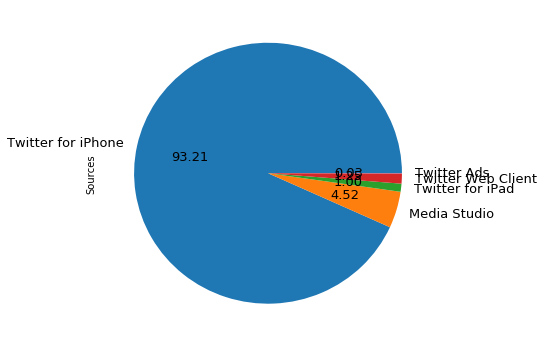

In [89]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=13, autopct='%.2f', figsize=(6, 6));

In [90]:
# to see sentiment anaylsis

In [91]:
from textblob import TextBlob
import re

In [92]:
def clean_tweet(tweet):

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
 
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [93]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

In [94]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Congratulations to France, who played extraord...",140,1018541464416997376,2018-07-15 17:03:03,Twitter for iPhone,40883,12336,1
1,...know how to do is resist and obstruct! This...,139,1018530179549822977,2018-07-15 16:18:12,Twitter for iPhone,18880,4173,0
2,"...over the years, I would return to criticism...",140,1018530173006692352,2018-07-15 16:18:11,Twitter for iPhone,17415,3952,1
3,"Heading to Helsinki, Finland – looking forward...",140,1018530167902228480,2018-07-15 16:18:10,Twitter for iPhone,20347,4958,1
4,There hasn’t been a missile or rocket fired in...,140,1018528420093878272,2018-07-15 16:11:13,Twitter for iPhone,43900,11399,0
5,RT @realDonaldTrump: The stories you heard abo...,140,1018490597865226245,2018-07-15 13:40:55,Twitter for iPhone,0,34710,0
6,RT @Scavino45: “Criminal Illegal Alien Deporte...,124,1018490463244902400,2018-07-15 13:40:23,Twitter for iPhone,0,4979,-1
7,RT @Scavino45: “Asylum-Seeking Central America...,107,1018488668984504321,2018-07-15 13:33:15,Twitter for iPhone,0,4643,0
8,RT @Scavino45: “MS-13 Gang Member Arrested Aga...,94,1018488668971884545,2018-07-15 13:33:15,Twitter for iPhone,0,4822,0
9,RT @Scavino45: “About 1-in-5 illegal alien adu...,140,1018488667474616320,2018-07-15 13:33:15,Twitter for iPhone,0,5547,-1


In [95]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [96]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 53.661576815207226%
Percentage of neutral tweets: 25.023371766905576%
Percentage de negative tweets: 21.315051417887194%
